In [101]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(10)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

#### Load stars datasets

INFO:tensorflow:Converted call: <function starmodels.csv_reader_dataset.<locals>.<lambda> at 0x7f7b703a1cb0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=string>,)
    kwargs: {}

INFO:tensorflow:Not allowed: <method-wrapper '__call__' of function object at 0x7f7b703a1cb0>: default rule
INFO:tensorflow:Not allowed: <function starmodels.csv_reader_dataset.<locals>.<lambda> at 0x7f7b703a1cb0>: default rule
INFO:tensorflow:<function starmodels.csv_reader_dataset.<locals>.<lambda> at 0x7f7b703a1cb0> is not cached for subkey ConversionOptions[{}]
INFO:tensorflow:Source code of <function starmodels.csv_reader_dataset.<locals>.<lambda> at 0x7f7b703a1cb0>:

lambda filename: tf.data.TextLineDataset(filename).skip(0),

INFO:tensorflow:Error transforming entity <function starmodels.csv_reader_dataset.<locals>.<lambda> at 0x7f7b703a1cb0>
Traceback (most recent call last):
  File "/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py",

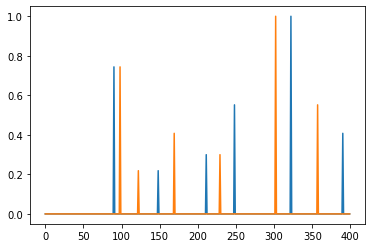

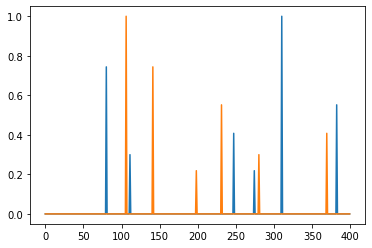

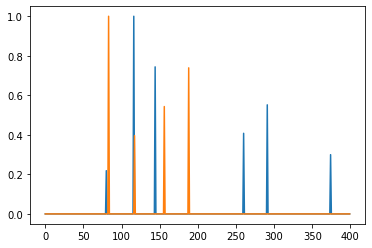

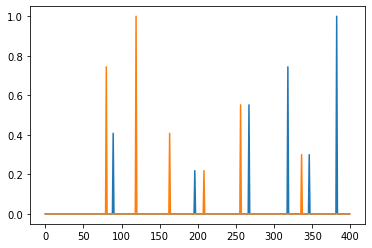

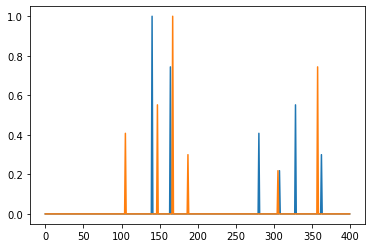

In [102]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
star_models = starmodels()

df_star_models = star_models.load(
    "/home/roberto/Downloads/evolutionTracks_line/parts_train/*_norm",
    batch_size=1,
    add_noise=False,
)

count = 0
for star in df_star_models:
    plt.plot(star[0][0, :, 0])
    plt.plot(star[0][0, :, 1])
    plt.show()
    if count == 4:
        break
    else:
        count += 1

In [103]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*_norm", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
csv_delta_scuti

INFO:tensorflow:Converted call: <function deltascuti.csv_reader_dataset.<locals>.<lambda> at 0x7f7b251de290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=string>,)
    kwargs: {}

INFO:tensorflow:Not allowed: <method-wrapper '__call__' of function object at 0x7f7b251de290>: default rule
INFO:tensorflow:Not allowed: <function deltascuti.csv_reader_dataset.<locals>.<lambda> at 0x7f7b251de290>: default rule
INFO:tensorflow:<function deltascuti.csv_reader_dataset.<locals>.<lambda> at 0x7f7b251de290> is not cached for subkey ConversionOptions[{}]
INFO:tensorflow:Source code of <function deltascuti.csv_reader_dataset.<locals>.<lambda> at 0x7f7b251de290>:

lambda filename: tf.data.TextLineDataset(filename).skip(0),

INFO:tensorflow:Error transforming entity <function deltascuti.csv_reader_dataset.<locals>.<lambda> at 0x7f7b251de290>
Traceback (most recent call last):
  File "/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py",

ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv  \
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360   
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470   
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630   
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850   
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970   
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620   
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262   
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770   
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850   
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350   
10       HD15082        80   6.140000  7430   0.000    0.0000   0.0000   

    rho-gh17  
0    0.06570  
1    0.41400  
2    0.12550  
3    0.02830  
4    0.26000  
5    0.02986  
6    0.12400  
7    0.05660  
8    0.42300  
9    0.20500  
10   0.50700

In [104]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*_norm", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=","
)
csv_bedding

INFO:tensorflow:Converted call: <function bedding.csv_reader_dataset.<locals>.<lambda> at 0x7f7b5c56b710>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=string>,)
    kwargs: {}

INFO:tensorflow:Not allowed: <method-wrapper '__call__' of function object at 0x7f7b5c56b710>: default rule
INFO:tensorflow:Not allowed: <function bedding.csv_reader_dataset.<locals>.<lambda> at 0x7f7b5c56b710>: default rule
INFO:tensorflow:<function bedding.csv_reader_dataset.<locals>.<lambda> at 0x7f7b5c56b710> is not cached for subkey ConversionOptions[{}]
INFO:tensorflow:Source code of <function bedding.csv_reader_dataset.<locals>.<lambda> at 0x7f7b5c56b710>:

lambda filename: tf.data.TextLineDataset(filename).skip(0),

INFO:tensorflow:Error transforming entity <function bedding.csv_reader_dataset.<locals>.<lambda> at 0x7f7b5c56b710>
Traceback (most recent call last):
  File "/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 432, in c

HD             Name         TIC      V    Teff      L  e.L.   rho  \
0     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
1     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
2    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
3    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
4    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
5    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
6    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
7    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
8    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
9    24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
10   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
11   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
12   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
13   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
14   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
15   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
16   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
17   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
18   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
19   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
20   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
21   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
22   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
23   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
24   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
25   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
26   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
27   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
28   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
29   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
30   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
31   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
32   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
33   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
34   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
35   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
36   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
37   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
38   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
39   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
40   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
41   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
42   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
43   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
44   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
45   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
46  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
47  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
48  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
49  290750.0              NaN    11199304   9.77  9170.0  19

### Load pretrainned NN model

In [105]:
sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_dos_400/")
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 399, 10)           50        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 395, 20)           1020      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 197, 20)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 197, 20)           80        
_________________________________________________________________
dropout (Dropout)            (None, 197, 20)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 183, 10)           3010      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 164, 10)           2

### Load $\rho$ Roche models

 ***warning, adaptative step performed on star models rho Roche search


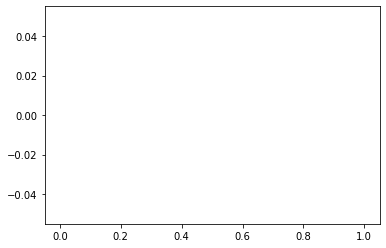

In [106]:
models = pd.read_csv(
    "/home/roberto/Downloads/evolutionTracks_line_rho_roche/models_params.csv",
    header=None,
    names=["Teff", "Dnu", "L_must", "rho_roche"],
)


def get_avg_rho_roche(teff, l, e_teff=300, e_l=1):
    """
    Get rho from Roche models by constrainning star models based
    on L and Teff. If there is not rsults, an adaptative search
    is performed
    """
    id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
    id_l = models["L_must"].between(l - e_l, l + e_l, inclusive=True)
    max_adaptative_iters = 1
    iters_count = 0
    while len(models[(id_teff & id_l)]) == 0 and iters_count < max_adaptative_iters:
        e_teff += 0
        id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
        iters_count += 1
        print(" ***warning, adaptative step performed on star models rho Roche search")
    return models[(id_teff & id_l)]["rho_roche"]


plt.hist(get_avg_rho_roche(8920.860521, 60))
plt.show()

In [107]:
models.head()

Teff       Dnu    L_must  rho_roche
0  7003.698151  4.595945  8.958895   0.261513
1  6692.500519  3.939547  9.538349   0.181079
2  7273.390641  5.358647  8.319189   0.368718
3  6373.830677  3.417505  9.875435   0.129814
4  7272.217140  5.354516  8.322262   0.368199

## Results for 11 Binary DS Stars

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1042db00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1042db00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b34421dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

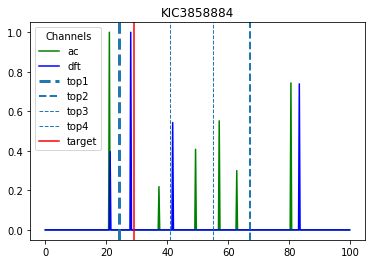

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b343ab050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b343ab050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343ab200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343ab200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b70151b00>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

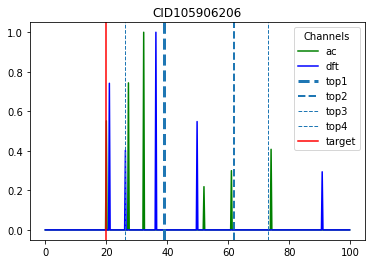

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34421dd0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34421dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151b00>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b343ab290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

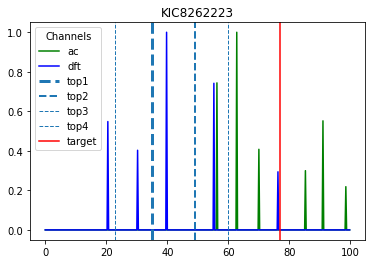

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1036d560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1036d560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10675b90>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10675b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b704b1050>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

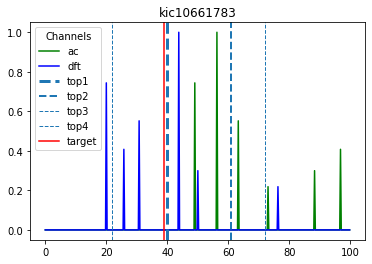

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc43b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc43b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1a70>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1a70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1036d680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

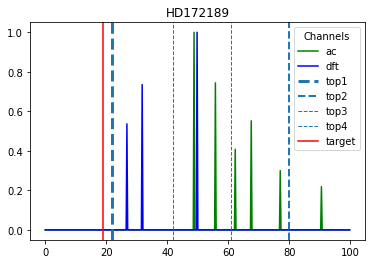

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2514d320>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2514d320>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1dd0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1042d830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

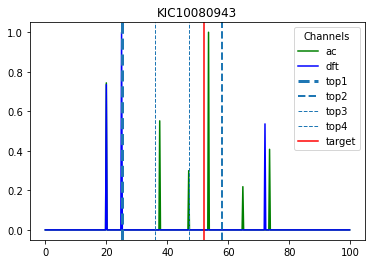

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10221200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10221200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b106754d0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b106754d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10357440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

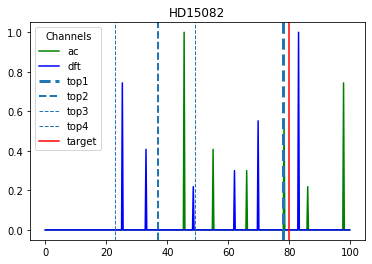

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c27e050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c27e050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1036d560>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

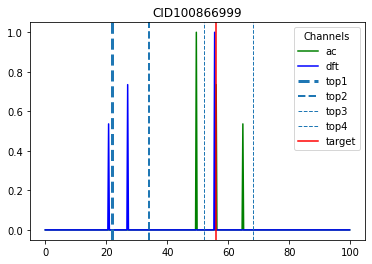

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13ea9950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13ea9950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2514d320>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2514d320>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b343ab170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

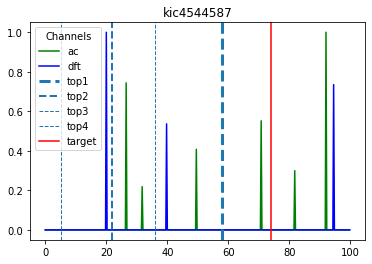

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25373b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25373b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13dc43b0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13dc43b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10675200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

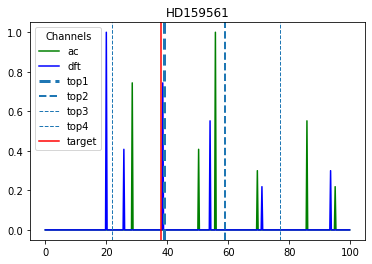

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34421dd0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34421dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10675200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10675200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10221200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

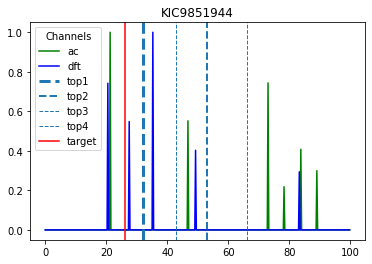

In [108]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=True,
)
df_results_delta_scuti.id = df_results_delta_scuti.id.str.upper()

In [109]:
# super simple model
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 2)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(df_delta_scuti, epochs=10)
"""

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(400, 2)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(100, activation='softmax')\n])\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\nmodel.fit(df_delta_scuti, epochs=10)\n"

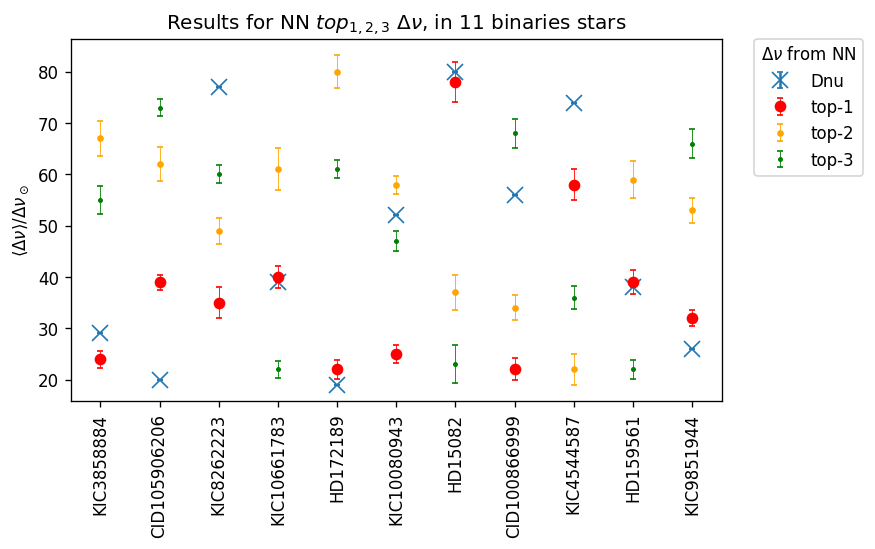

In [110]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [111]:
df_results_delta_scuti_merged = df_results_delta_scuti.merge(
    csv_delta_scuti, left_on="id", right_on="ID", how="left"
).drop("ID", 1)
df_results_delta_scuti_merged

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0     KIC3858884         29   24  1.672944   67  3.327406   55  2.779622   41   
1   CID105906206         20   39  1.482000   62  3.242886   73  1.641892   26   
2     KIC8262223         77   35  3.004782   49  2.536740   60  1.737183   23   
3    KIC10661783         39   40  2.190981   61  4.092776   22  1.687342   72   
4       HD172189         19   22  1.807072   80  3.184213   61  1.715782   42   
5    KIC10080943         52   25  1.674571   58  1.777454   47  1.972460   36   
6        HD15082         80   78  3.947321   37  3.375548   23  3.672809   49   
7   CID100866999         56   22  2.145102   34  2.423006   68  2.883298   52   
8     KIC4544587         74   58  3.040199   22  3.014071   36  2.254252    5   
9       HD159561         38   39  2.403764   59  3.569282   22  1.793167   77   
10    KIC9851944         26   32  1.626827   53  2.381119   66  2.824818   43   

      e-top4  ...  e-rho-top3    rho-top4 e-rho-top4  Dnu_muHz          L  \
0   2.801978  ...    0.082390    0.144534   0.045781        29  21.520774   
1   1.854205  ...    0.145372    0.057596   0.018463        20   9.396579   
2   1.435169  ...    0.098083   0.0449611   0.014468        77   5.139949   
3   1.857002  ...    0.013245    0.450773   0.141401        39  29.304625   
4   4.616539  ...    0.101387    0.151743   0.048039        19  29.942319   
5   1.476588  ...    0.060151    0.111142   0.035312        52   7.085301   
6   2.164582  ...    0.014468    0.207177   0.065380        80   6.140000   
7   2.545777  ...    0.126072      0.2336   0.073637        56   3.865000   
8   0.988034  ...    0.035312  0.00206094   0.000708        74   6.475306   
9   3.189800  ...    0.013245    0.516247   0.161815        38  24.642612   
10  0.778992  ...    0.118742     0.15913   0.050351        26  60.062351   

    Teff L.Ltot  parallax       mv  rho-gh17  
0   6606  0.470    1.7800   9.3360   0.06570  
1   6750  0.940    0.9901  12.2620   0.02986  
2   9128  0.900    0.9832  12.8850   0.42300  
3   7764  0.937    1.9400   9.5630   0.12550  
4   7750  0.702    2.2700   8.8850   0.02830  
5   7480  0.500    1.0600  11.7350   0.20500  
6   7430  0.000    0.0000   0.0000   0.50700  
7   7300    NaN    0.5654  15.0970   0.26000  
8   7750  0.332    1.3600  10.8470   0.41400  
9   8047  1.000   67.1300   2.1262   0.12400  
10  6902  0.500    0.4100  11.4770   0.05660  

[11 rows x 29 columns]

#### Select the closest $\text{top}_1$ or $\text{top}_2$ to the RM relation

In [112]:
def check_dnu_in_RM_relation(dnu, rho):
    """
    """
    # Get rho with upper and lower limits
    rs = get_rho(dnu / dnu_sun)
    rs_upper = get_rho_upper_bound(dnu / dnu_sun)
    rs_lower = get_rho_lower_bound(dnu / dnu_sun)

    # Check if proposed rho is inside bands
    if rho >= rs_lower and rho <= rs_upper:
        return True
    else:
        return False


df_results_delta_scuti_merged[["top1", "rho-gh17"]].apply(
    lambda x: check_dnu_in_RM_relation(x["top1"], x["rho-gh17"]), axis=1
)

0     False
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9      True
10    False
dtype: bool

In [113]:
# Select best from top1, top1/2 or top1*2
tops_ds = inferences.select_best_top1(
    df_results_delta_scuti_merged, target_column="rho-gh17"
)
print(tops_ds)

[24 19.5 70 40 22 50 78 44 58 39 32]


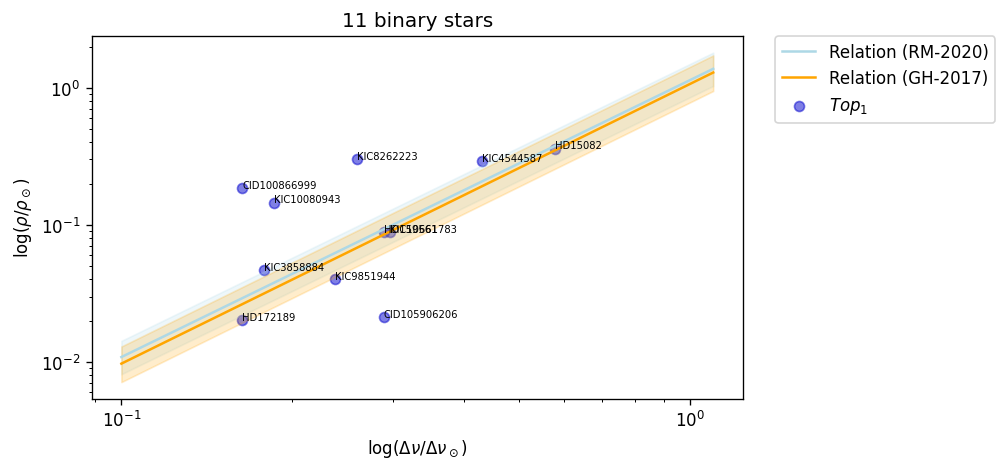

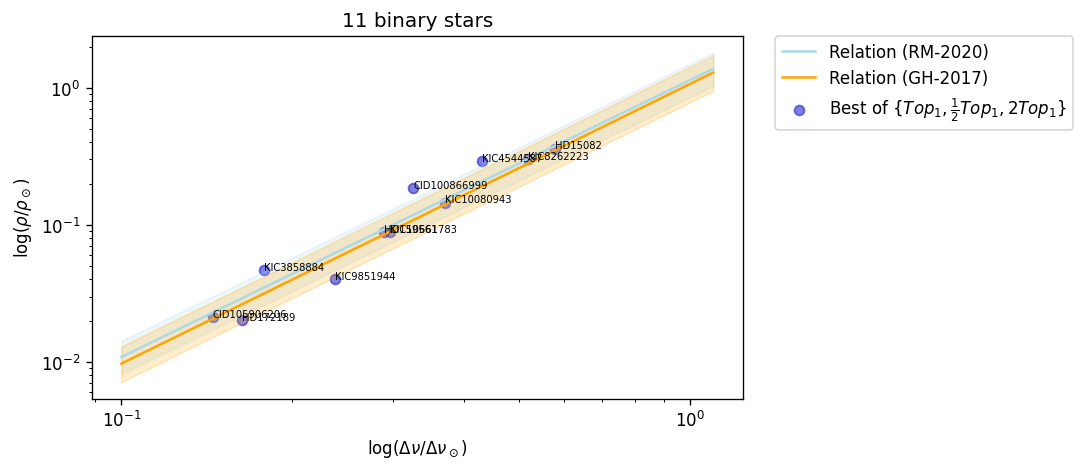

In [114]:
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top1"].values.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="$Top_1$",
)

inferences.plot_relation_rodriguez(
    dnus=tops_ds.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
)

## Results for 57 Bedding stars


INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25278680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25278680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b252787a0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b252787a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278b90>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

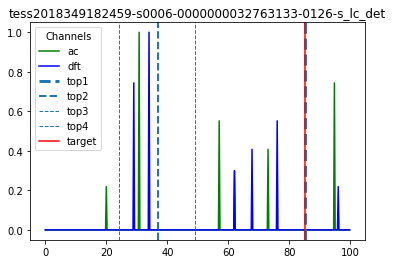

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252780e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252780e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25278b90>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25278b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278cb0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

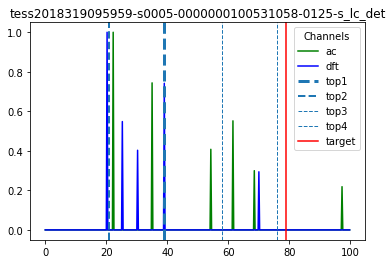

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c5867a0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c5867a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103be830>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103be830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

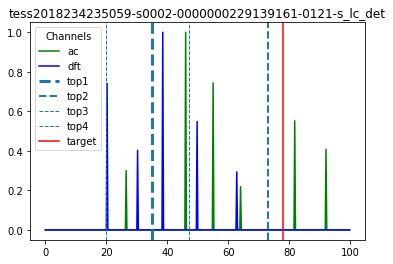

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25332050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25332050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103be560>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103be560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b252780e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

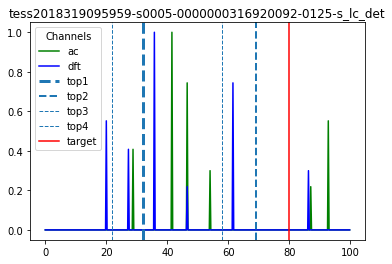

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b704b13b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b704b13b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c5867a0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c5867a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

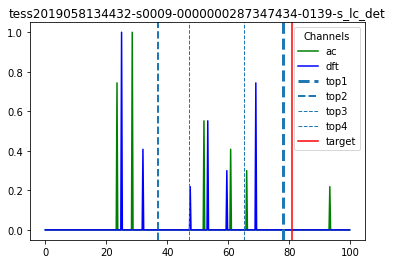

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1f8950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1f8950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1ef0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1ef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

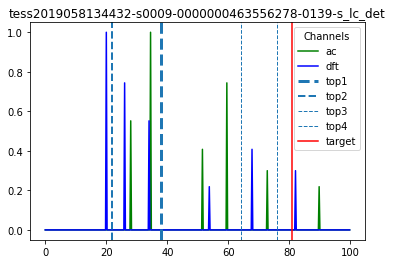

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b106c57a0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b106c57a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254fcf80>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254fcf80>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

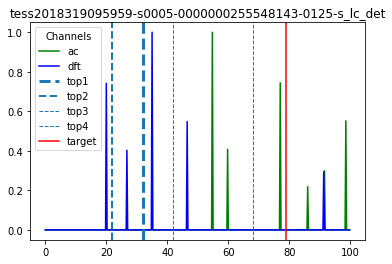

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13de75f0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13de75f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2517dd40>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2517dd40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b252780e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

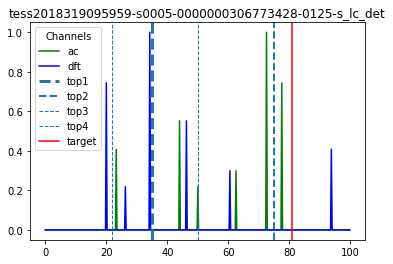

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70408440>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70408440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70147c20>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70147c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

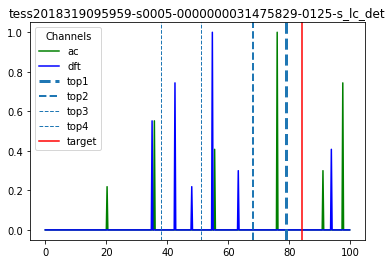

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4b83b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4b83b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25462b00>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25462b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b252783b0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

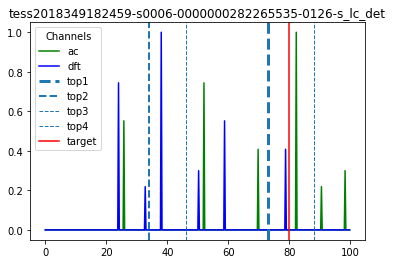

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70426200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70426200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3129e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3129e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

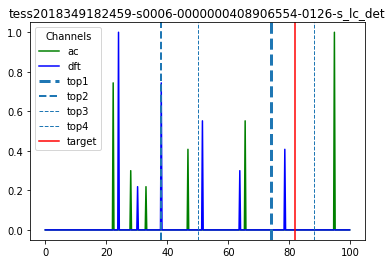

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b700fb170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b700fb170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1038c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1038c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

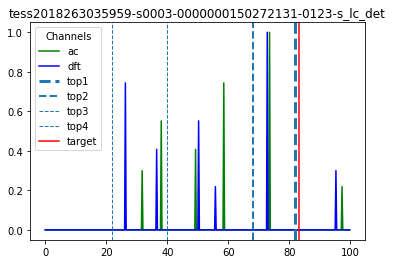

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1038c0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1038c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343510e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343510e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278c20>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

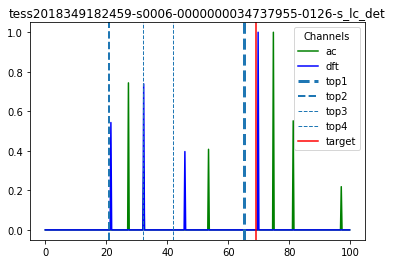

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b103280e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b103280e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3129e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3129e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

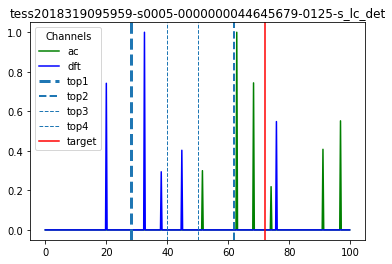

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1043e170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

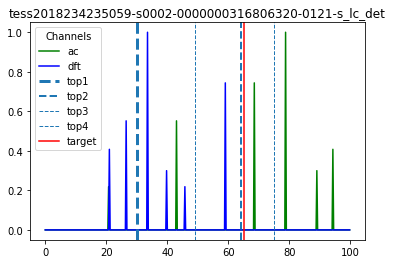

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608830>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0560>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1043ee60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

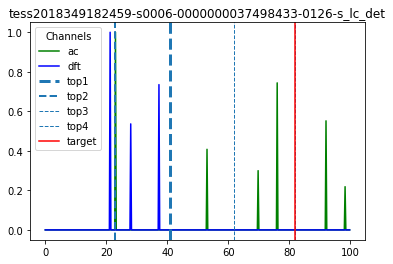

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25541ef0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25541ef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1043e7a0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1043e7a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

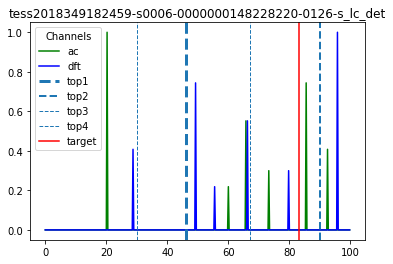

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1060ee60>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1060ee60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d08c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d08c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

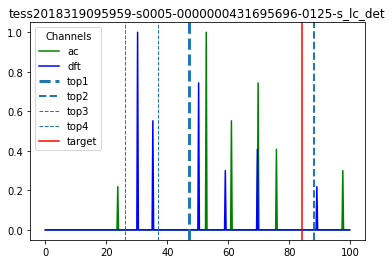

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b104b3170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b104b3170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1060ecb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1060ecb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b106089e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

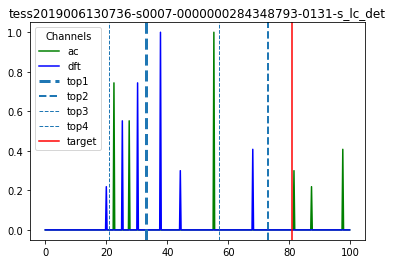

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2502de60>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2502de60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c19a830>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c19a830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257d0170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

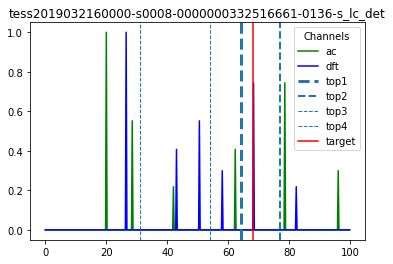

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257094d0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257094d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13d85c20>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13d85c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

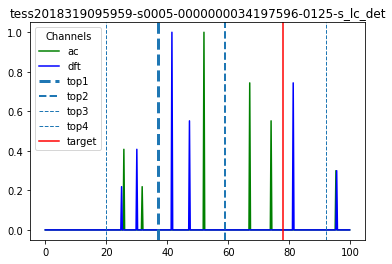

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608830>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257d05f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

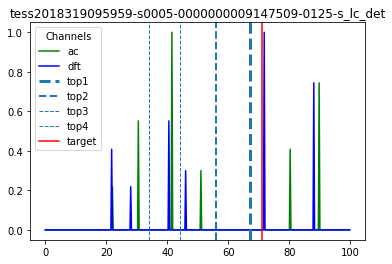

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2555e440>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2555e440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257b3200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

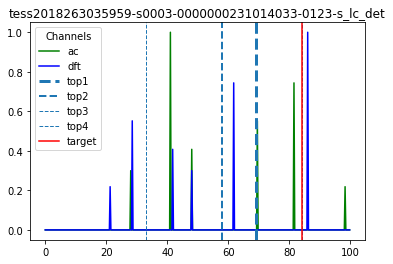

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257094d0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257094d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d05f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d05f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

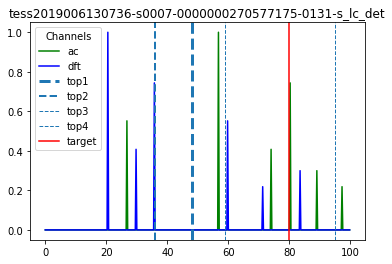

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25434b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25434b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b106089e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

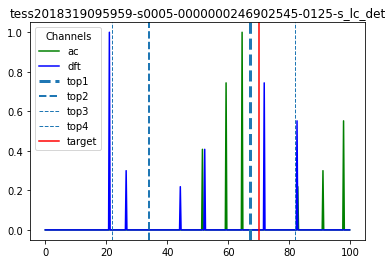

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d05f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d05f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

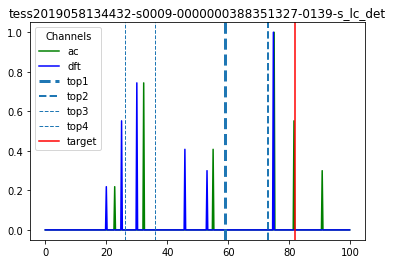

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b105e1050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b105e1050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257d0170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

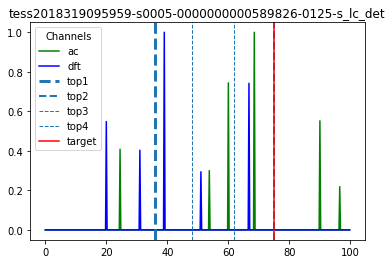

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c168c20>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c168c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608830>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10261710>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

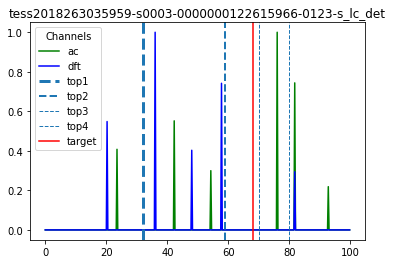

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34469b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34469b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b255225f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b255225f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1050>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

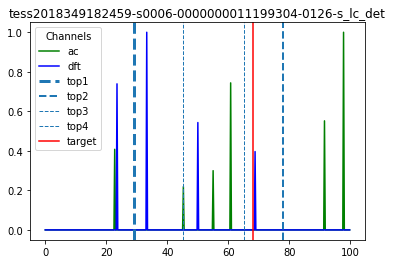

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2547bb90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2547bb90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1050>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

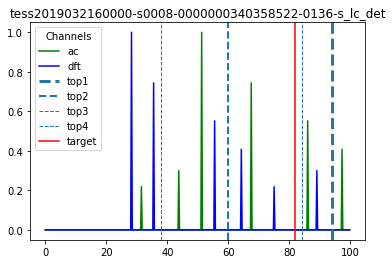

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4c8a70>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4c8a70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b13eb3c20>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

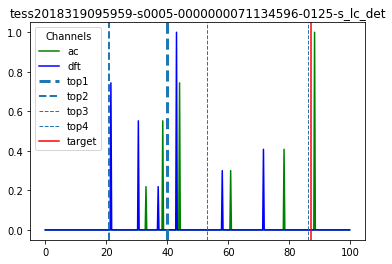

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13fd5680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13fd5680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13eb3dd0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13eb3dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c4c8b90>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

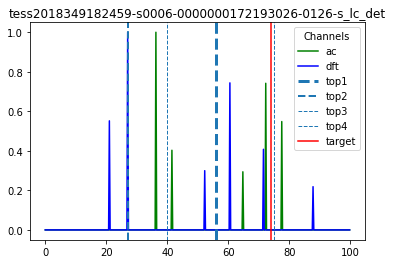

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13da2680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13da2680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c0563b0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c0563b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10608290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

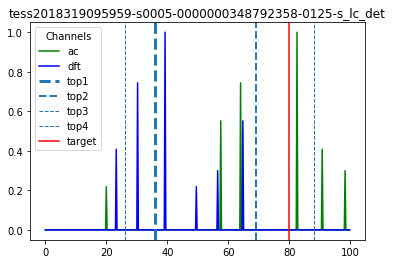

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b105e1560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b105e1560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1950>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257099e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

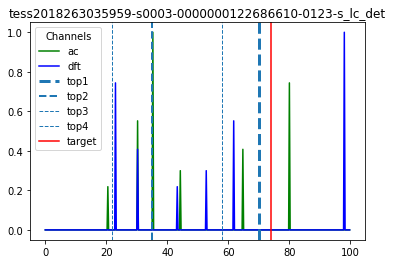

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257b3b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1950>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b105e1950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25709ef0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

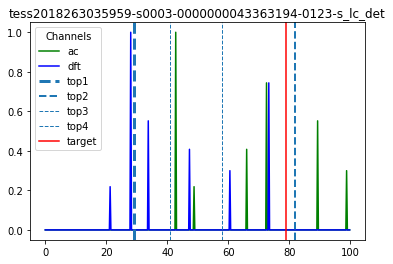

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25709e60>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25709e60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709ef0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709ef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1ef0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

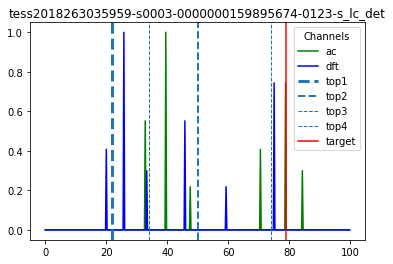

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10503680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10503680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709a70>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709a70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e18c0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

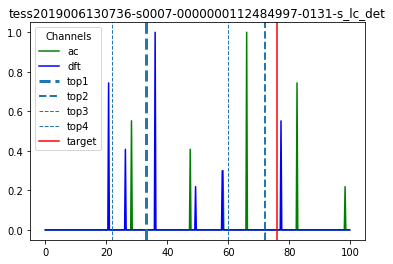

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a320>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a320>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10503680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10503680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

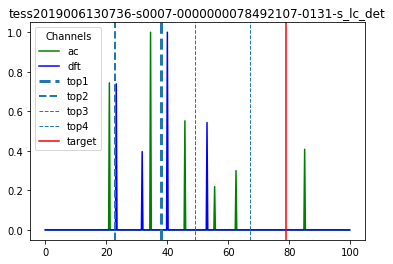

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10506cb0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10506cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257b3b90>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257b3b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e18c0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

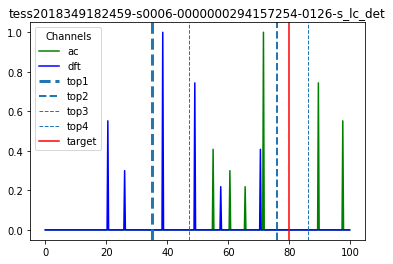

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2570c3b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2570c3b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254340e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254340e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1ef0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

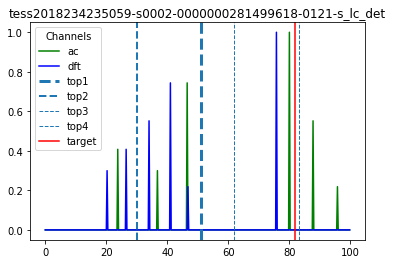

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc6e60>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc6e60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e17a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

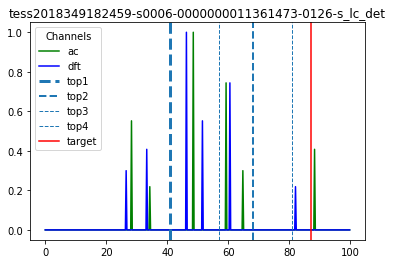

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2566b050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2566b050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70112cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70112cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

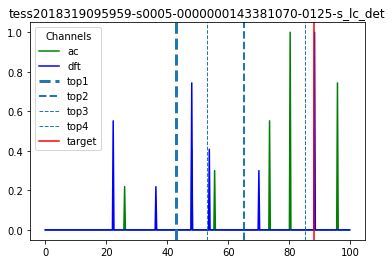

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc6e60>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13dc6e60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10503680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10503680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e18c0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

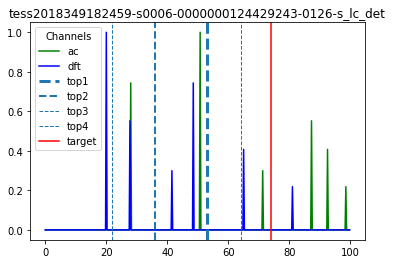

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b3440d0e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b3440d0e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709a70>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25709a70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

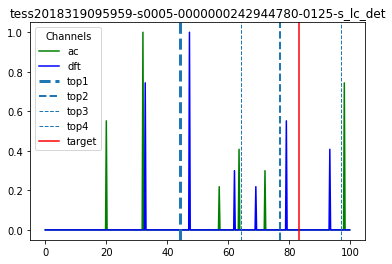

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25184170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25184170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e17a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

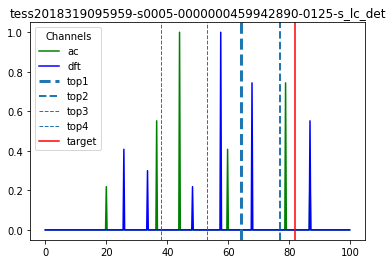

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c168320>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c168320>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

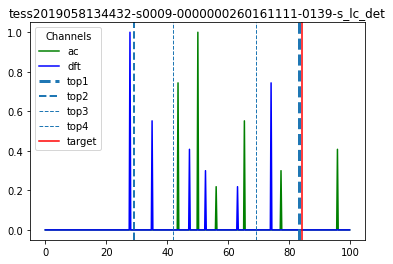

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b102a4b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b102a4b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d0e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b3440d0e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e17a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

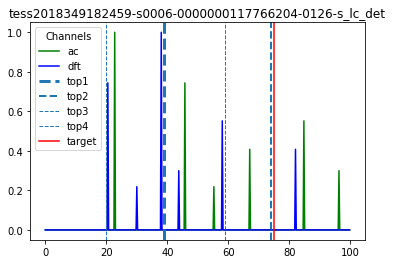

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70191f80>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70191f80>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1560>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

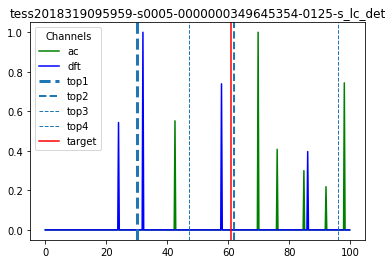

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2548d8c0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2548d8c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

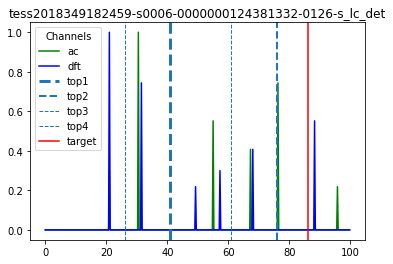

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252e6ef0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252e6ef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

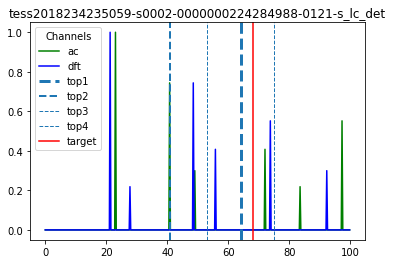

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13fa6680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13fa6680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

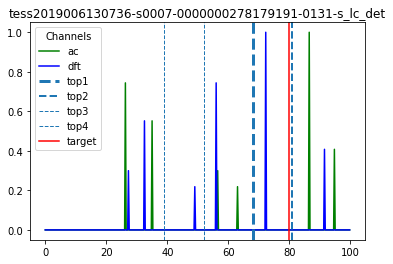

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70115560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70115560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2545c170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b105e1560>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

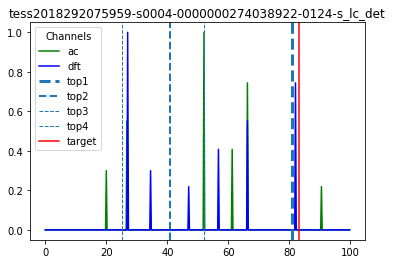

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25278dd0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25278dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

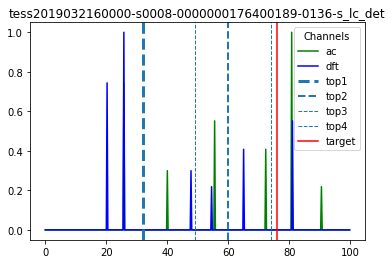

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25703560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25703560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

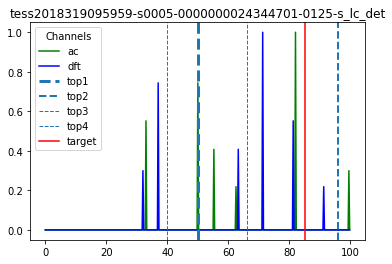

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c05f9e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c05f9e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343514d0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b343514d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278320>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

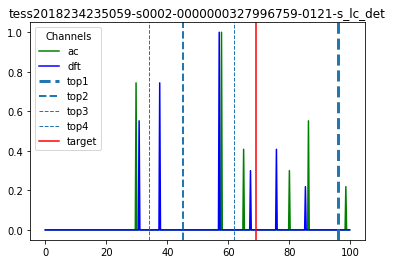

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351b00>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25278d40>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

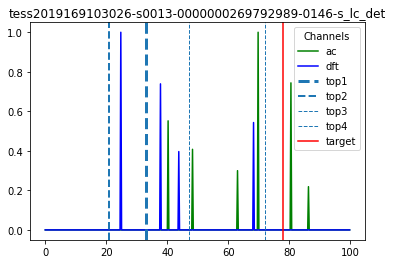

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70151c20>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70151c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34351200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b252787a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

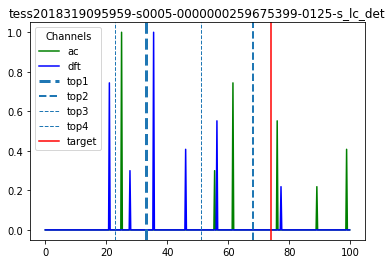

In [115]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=True,
)

In [116]:
df_results_bedding["TIC"] = df_results_bedding["id"].str.split("-").str[2].astype(int)
df_bedding_att = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=",", index_col=0
)
df_bedding_att
df_bedding_att = df_bedding_att.head(57)
df_bedding_att["TIC"] = df_bedding_att["TIC"].astype(int)

# Merge
df_results_bedding_merged = df_results_bedding.merge(
    df_bedding_att, left_on="TIC", right_on="TIC", how="left"
)

# Replace L and Teff Bedding values, for MAST values when NaN
df_results_bedding_merged.L.fillna(df_results_bedding_merged.L_mast, inplace=True)
df_results_bedding_merged.Teff.fillna(df_results_bedding_merged.Teff_mast, inplace=True)

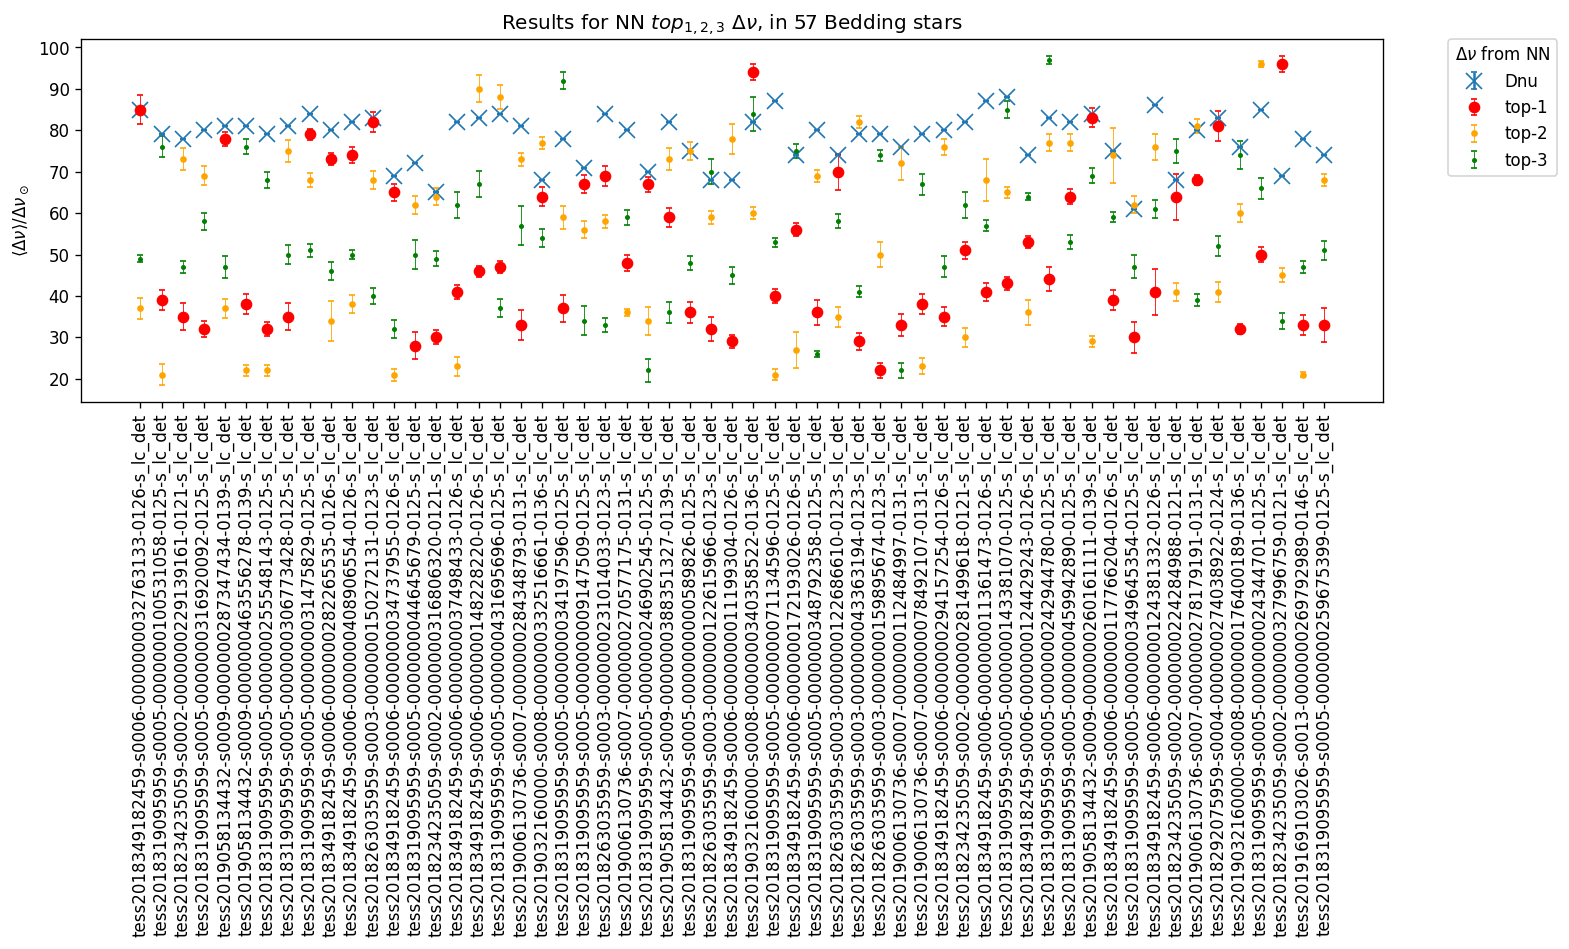

In [117]:
inf.plot_inferences(
    df_results_bedding_merged,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

In [118]:
df_results_bedding_merged["avg_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.average(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)

df_results_bedding_merged["sd_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)

df_results_bedding_merged

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 ***warning, adaptative step performed on star models rho Roche search


id dnu-target top1  \
0   tess2018349182459-s0006-0000000032763133-0126-...         85   85   
1   tess2018319095959-s0005-0000000100531058-0125-...         79   39   
2   tess2018234235059-s0002-0000000229139161-0121-...         78   35   
3   tess2018319095959-s0005-0000000316920092-0125-...         80   32   
4   tess2019058134432-s0009-0000000287347434-0139-...         81   78   
5   tess2019058134432-s0009-0000000463556278-0139-...         81   38   
6   tess2018319095959-s0005-0000000255548143-0125-...         79   32   
7   tess2018319095959-s0005-0000000306773428-0125-...         81   35   
8   tess2018319095959-s0005-0000000031475829-0125-...         84   79   
9   tess2018349182459-s0006-0000000282265535-0126-...         80   73   
10  tess2018349182459-s0006-0000000408906554-0126-...         82   74   
11  tess2018263035959-s0003-0000000150272131-0123-...         83   82   
12  tess2018349182459-s0006-0000000034737955-0126-...         69   65   
13  tess2018319095959-s0005-0000000044645679-0125-...         72   28   
14  tess2018234235059-s0002-0000000316806320-0121-...         65   30   
15  tess2018349182459-s0006-0000000037498433-0126-...         82   41   
16  tess2018349182459-s0006-0000000148228220-0126-...         83   46   
17  tess2018319095959-s0005-0000000431695696-0125-...         84   47   
18  tess2019006130736-s0007-0000000284348793-0131-...         81   33   
19  tess2019032160000-s0008-0000000332516661-0136-...         68   64   
20  tess2018319095959-s0005-0000000034197596-0125-...         78   37   
21  tess2018319095959-s0005-0000000009147509-0125-...         71   67   
22  tess2018263035959-s0003-0000000231014033-0123-...         84   69   
23  tess2019006130736-s0007-0000000270577175-0131-...         80   48   
24  tess2018319095959-s0005-0000000246902545-0125-...         70   67   
25  tess2019058134432-s0009-0000000388351327-0139-...         82   59   
26  tess2018319095959-s0005-0000000000589826-0125-...         75   36   
27  tess2018263035959-s0003-0000000122615966-0123-...         68   32   
28  tess2018349182459-s0006-0000000011199304-0126-...         68   29   
29  tess2019032160000-s0008-0000000340358522-0136-...         82   94   
30  tess2018319095959-s0005-0000000071134596-0125-...         87   40   
31  tess2018349182459-s0006-0000000172193026-0126-...         74   56   
32  tess2018319095959-s0005-0000000348792358-0125-...         80   36   
33  tess2018263035959-s0003-0000000122686610-0123-...         74   70   
34  tess2018263035959-s0003-0000000043363194-0123-...         79   29   
35  tess2018263035959-s0003-0000000159895674-0123-...         79   22   
36  tess2019006130736-s0007-0000000112484997-0131-...         76   33   
37  tess2019006130736-s0007-0000000078492107-0131-...         79   38   
38  tess2018349182459-s0006-0000000294157254-0126-...         80   35   
39  tess2018234235059-s0002-0000000281499618-0121-...         82   51   
40  tess2018349182459-s0006-0000000011361473-0126-...         87   41   
41  tess2018319095959-s0005-0000000143381070-0125-...         88   43   
42  tess2018349182459-s0006-0000000124429243-0126-...         74   53   
43  tess2018319095959-s0005-0000000242944780-0125-...         83   44   
44  tess2018319095959-s0005-0000000459942890-0125-...         82   64   
45  tess2019058134432-s0009-0000000260161111-0139-...         84   83   
46  tess2018349182459-s0006-0000000117766204-0126-...         75   39   
47  tess2018319095959-s0005-0000000349645354-0125-...         61   30   
48  tess2018349182459-s0006-0000000124381332-0126-...         86   41   
49  tess2018234235059-s0002-0000000224284988-0121-...         68   64   
50  tess2019006130736-s0007-0000000278179191-0131-...         80   68   
51  tess2018292075959-s0004-0000000274038922-0124-...         83   81   
52  tess2019032160000-s0008-0000000176400189-0136-...         76   32   
53  tess2018319095959-s0005-0000000024344701-0125-...         85   50   
54  tess2018234235059-s0002-00000003

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


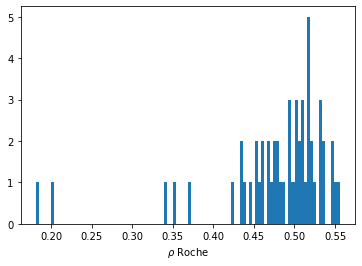

In [119]:
plt.hist(df_results_bedding_merged["avg_rho_roche"], bins=100)
plt.xlabel("$\\rho$ Roche")
plt.show()

In [120]:
tops_bedding = inferences.select_best_top1(
    df_results_bedding_merged, target_column="avg_rho_roche"
)
print(tops_bedding)

[85 78 70 64 78 38 64 70 79 73 74 82 65 56 60 82 46 94 66 64 74 67 69 96
 67 59 72 64 58 94 80 56 72 70 58 44 66 76 70 102 82 86 106 88 64 83 78 60
 82 64 68 81 64 100 96 66 66]


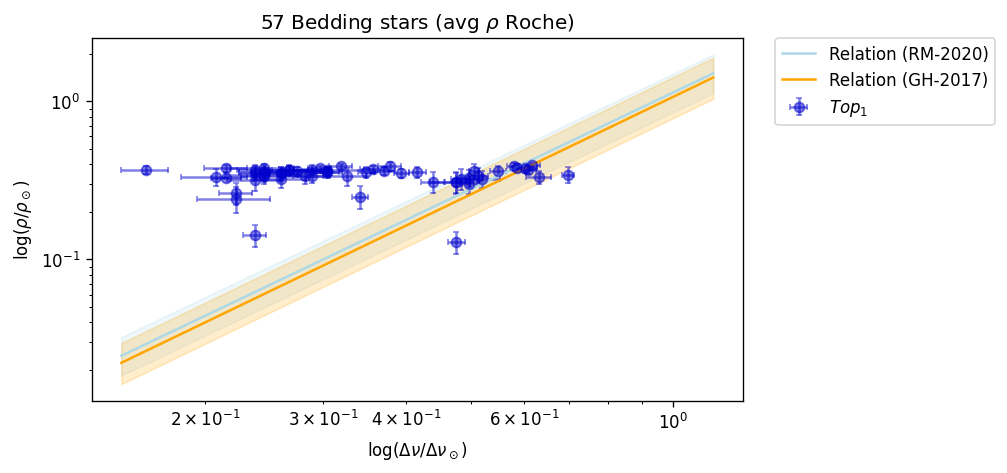

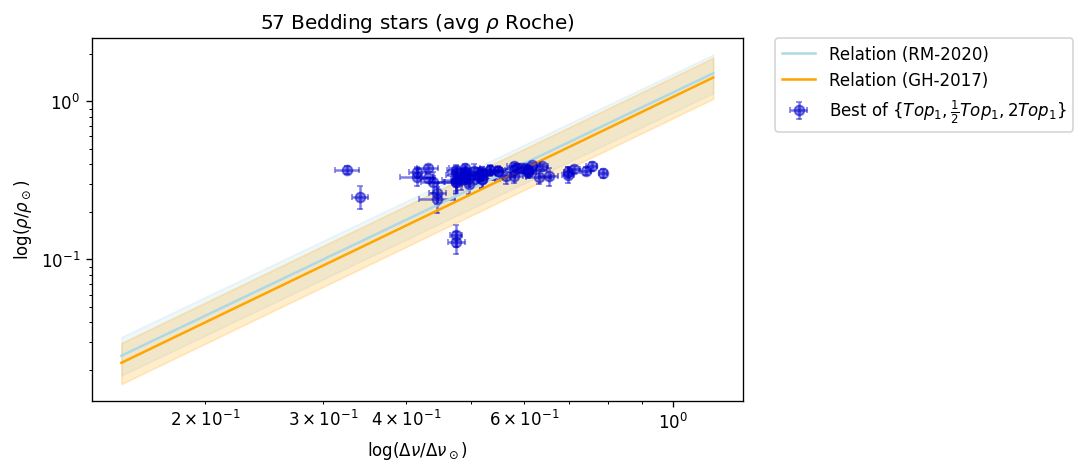

In [121]:
inferences.plot_relation_rodriguez(
    dnus=df_results_bedding_merged["top1"].values.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.15, 1.3),
)

inferences.plot_relation_rodriguez(
    dnus=tops_bedding.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.15, 1.3),
)

### Histogram of $\rho$ Roche distributions for every single star (57 Bedding stars)

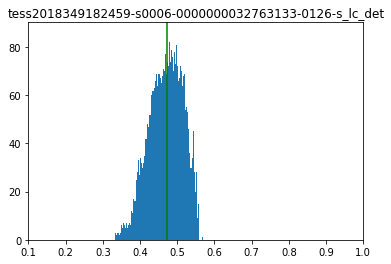

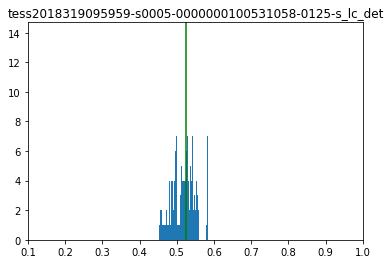

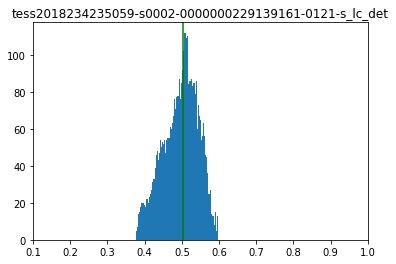

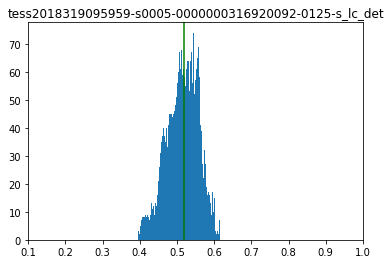

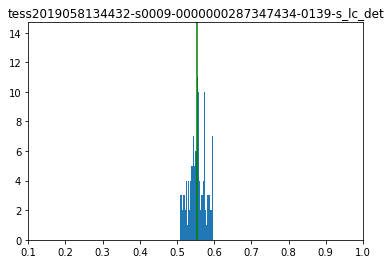

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


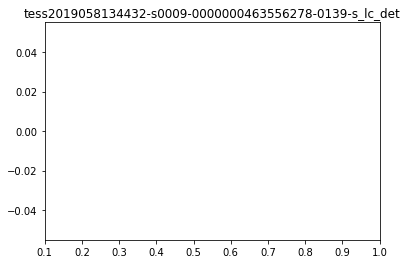

In [122]:
for i, row in df_results_bedding_merged.iterrows():
    avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
    plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
    plt.axvline(x=avg_rho_roche, color="green")
    plt.title(row["id"])
    plt.xlim(0.1, 1.0)
    plt.show()
    if i == 5:
        break

# CoRoT Stars

In [123]:
# Read datasets of preprocessed stars
df_corot = corot()
df_cor = df_corot.load("../../astronn/data/corot/preprocessed/*_norm", batch_size=1)

INFO:tensorflow:Converted call: <function corot.csv_reader_dataset.<locals>.<lambda> at 0x7f7b13e81950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=string>,)
    kwargs: {}

INFO:tensorflow:Not allowed: <method-wrapper '__call__' of function object at 0x7f7b13e81950>: default rule
INFO:tensorflow:Not allowed: <function corot.csv_reader_dataset.<locals>.<lambda> at 0x7f7b13e81950>: default rule
INFO:tensorflow:<function corot.csv_reader_dataset.<locals>.<lambda> at 0x7f7b13e81950> is not cached for subkey ConversionOptions[{}]
INFO:tensorflow:Source code of <function corot.csv_reader_dataset.<locals>.<lambda> at 0x7f7b13e81950>:

lambda filename: tf.data.TextLineDataset(filename).skip(0),

INFO:tensorflow:Error transforming entity <function corot.csv_reader_dataset.<locals>.<lambda> at 0x7f7b13e81950>
Traceback (most recent call last):
  File "/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 432, in converted_c

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13d85440>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13d85440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25470170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25470170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25470290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

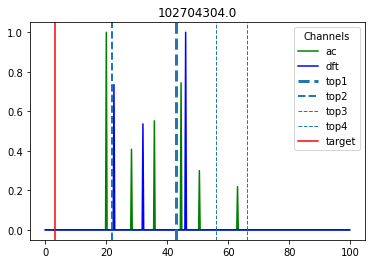

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e368c0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e368c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e36c20>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e36c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b2503cef0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

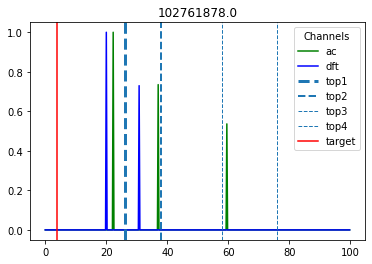

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1043ea70>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1043ea70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25703170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25703170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257d05f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

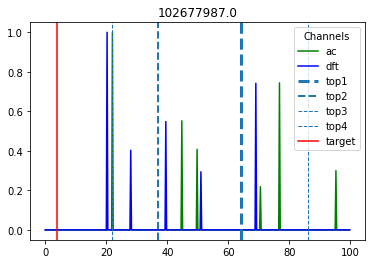

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1043e830>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1043e830>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25703170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25703170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257d07a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

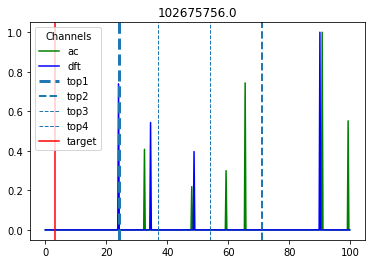

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7042eef0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7042eef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b704b1290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

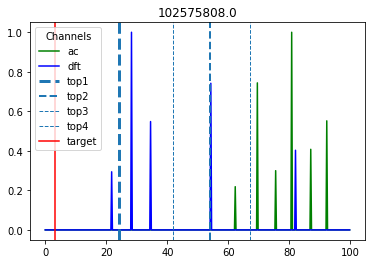

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b344364d0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b344364d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7042eef0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7042eef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703cb0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

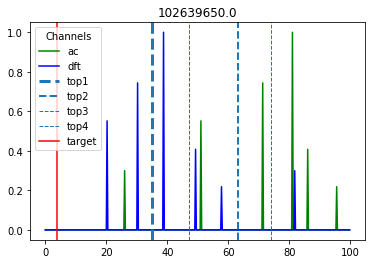

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e36170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e36170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

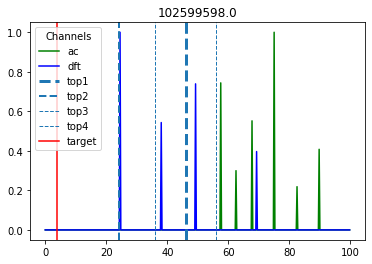

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7015e680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7015e680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7e5f9d40>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7e5f9d40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703320>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

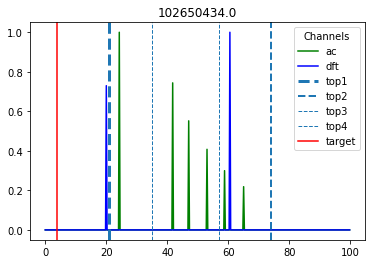

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b257d0b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2573a680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b2573a680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

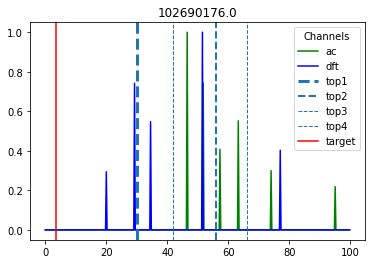

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b255c4710>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b255c4710>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7042eef0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7042eef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703710>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

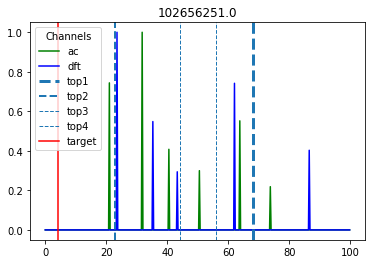

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101a25f0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101a25f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1055f950>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1055f950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

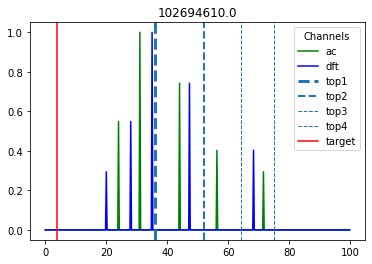

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4ff680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c4ff680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254d2710>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b254d2710>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

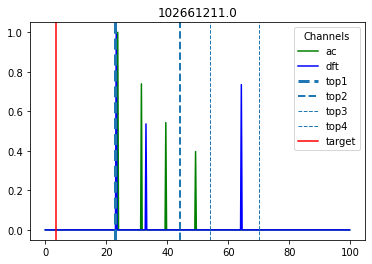

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13ee8560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13ee8560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25074dd0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25074dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

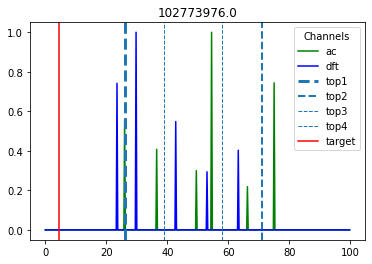

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c323440>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c323440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13eeacb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13eeacb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703710>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

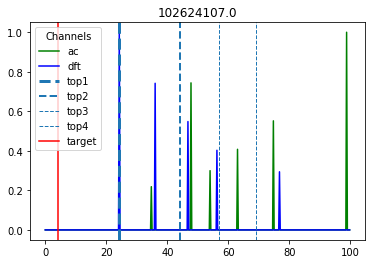

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70191dd0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70191dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c332b90>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c332b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

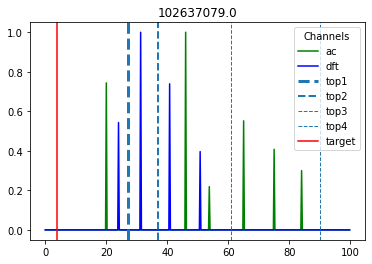

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b102f6200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b102f6200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25799680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25799680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

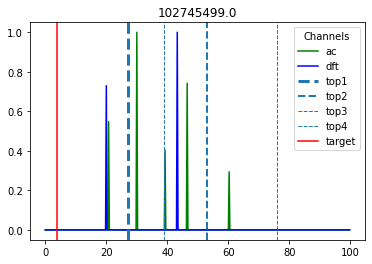

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c372950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c372950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7015e680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b7015e680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

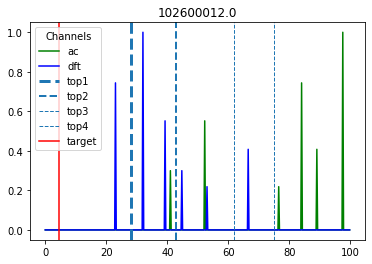

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13df2200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13df2200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25074dd0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25074dd0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703e60>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

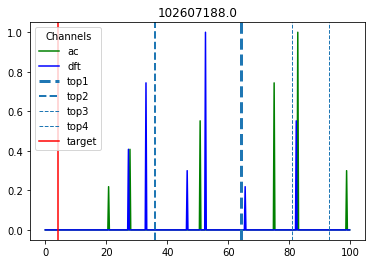

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10474200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10474200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10416710>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10416710>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

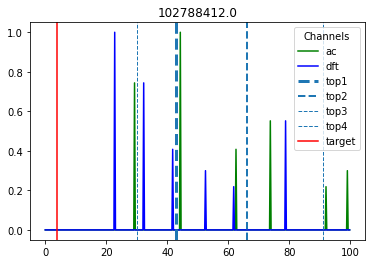

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1069a950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1069a950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b102f6200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b102f6200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703680>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

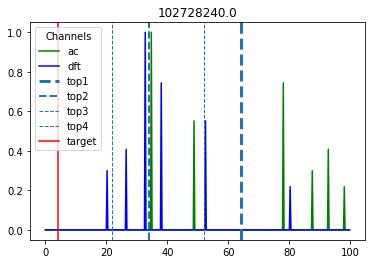

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b247d6c20>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b247d6c20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e324d0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e324d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

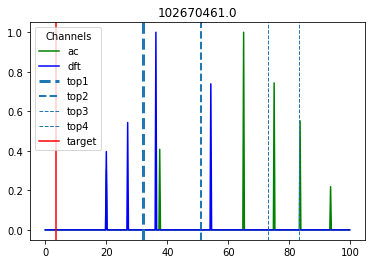

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c13dcb0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c13dcb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b256810e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b256810e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b13f93b00>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

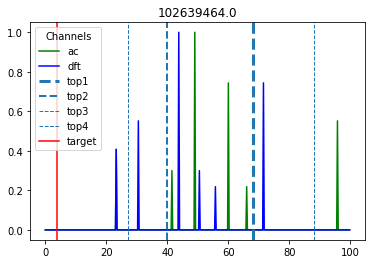

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25681320>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25681320>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c13d5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c13d5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b13f93560>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

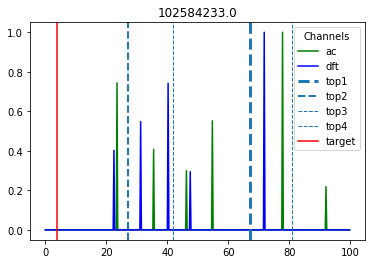

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13f93950>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13f93950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

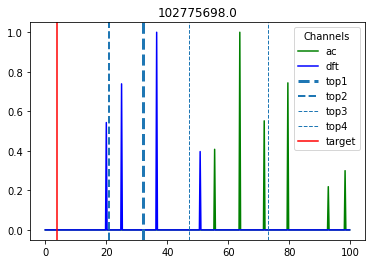

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25434950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25434950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

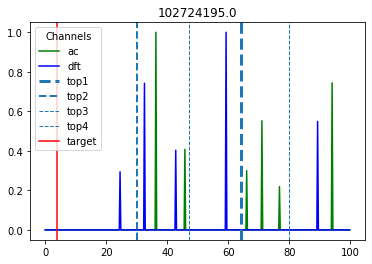

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1060e3b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1060e3b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d5f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

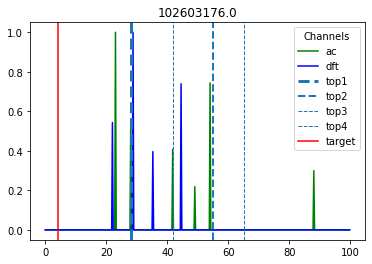

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10506950>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10506950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

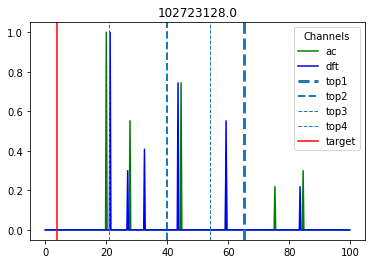

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25470cb0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25470cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d5f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

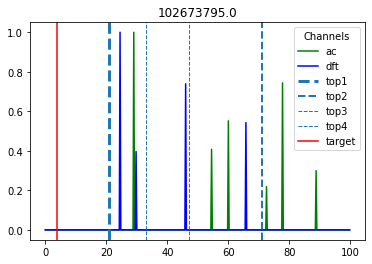

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101fe170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101fe170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

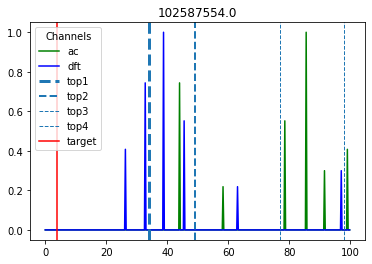

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b3434e7a0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b3434e7a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

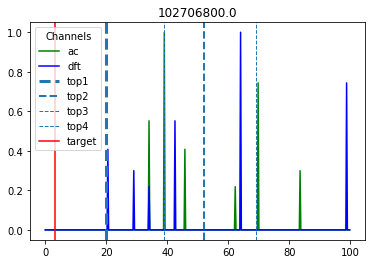

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101b1b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b101b1b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b103898c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13dcb0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

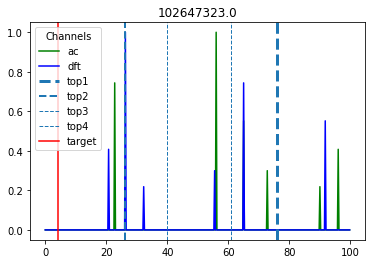

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25458ef0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25458ef0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d0e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

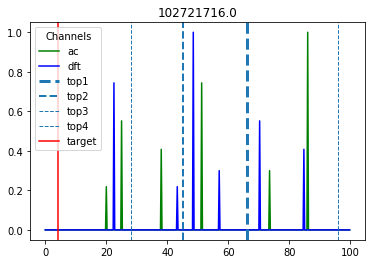

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25566560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25566560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d7a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

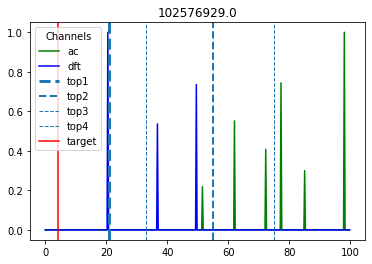

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25709290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25709290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d0e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

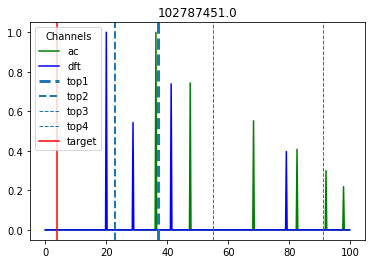

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25799290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25799290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d290>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

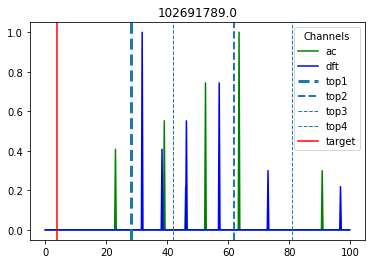

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c05ad40>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c05ad40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13df9cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

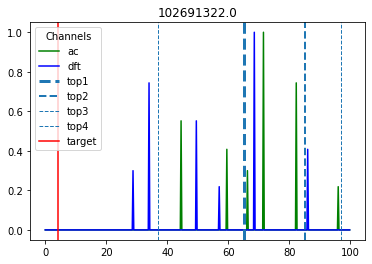

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1108c0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c1108c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b102a4680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b102a4680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d5f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

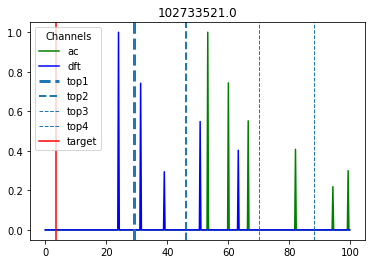

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252030e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b252030e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1108c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1108c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d5f0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

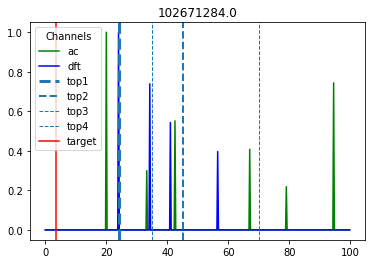

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b253933b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b253933b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1108c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c1108c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13dcb0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

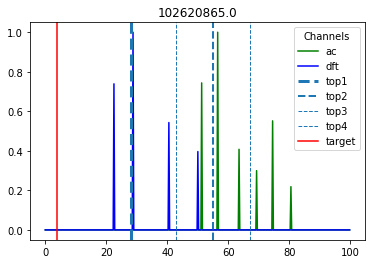

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b24811b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b24811b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25203290>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25203290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c13d440>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

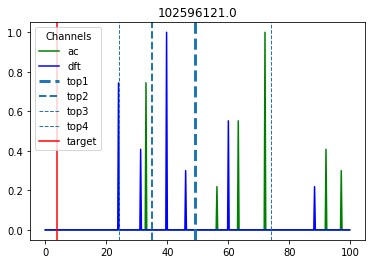

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b700418c0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b700418c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028be60>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028be60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102444d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

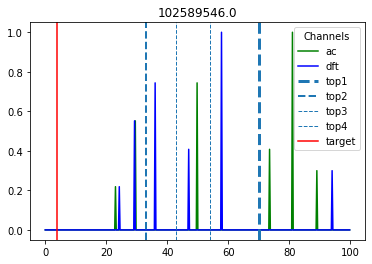

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10244f80>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10244f80>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10244e60>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10244e60>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1028b200>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

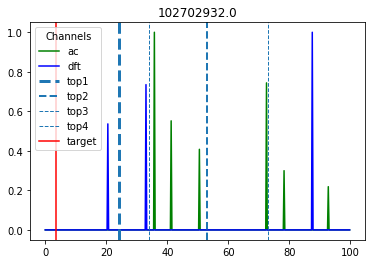

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1028bc20>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1028bc20>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028b950>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028b950>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

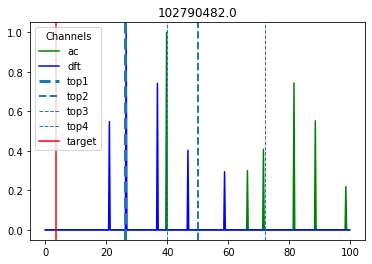

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25332d40>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25332d40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028b8c0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1028b8c0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b1050c950>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

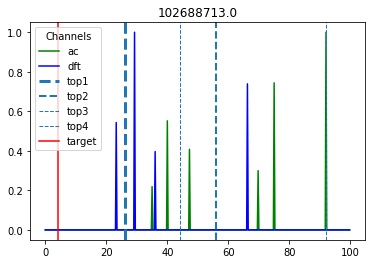

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a0e0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7012a0e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332170>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

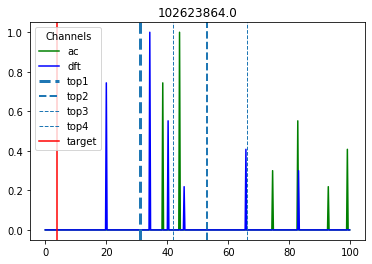

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70151050>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70151050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332d40>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25332d40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

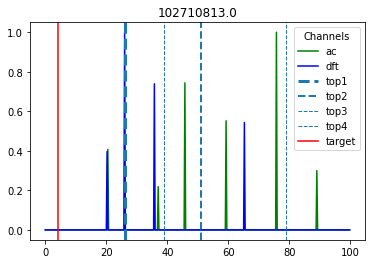

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c19a3b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b5c19a3b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102444d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

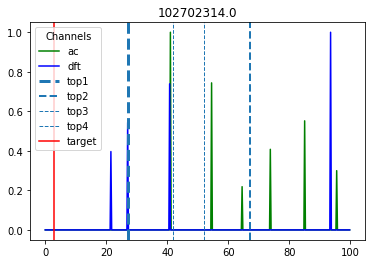

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b255c43b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b255c43b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

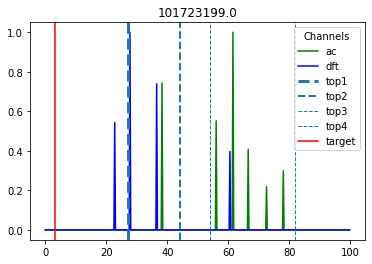

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34381560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34381560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b70151050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102440e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

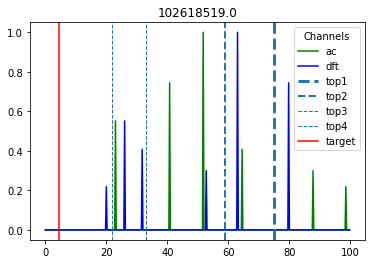

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b255c4440>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b255c4440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102449e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

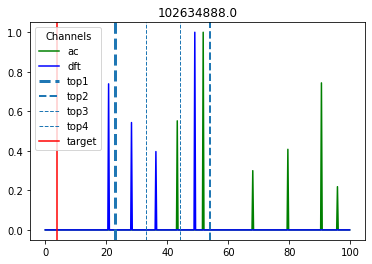

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25550440>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25550440>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34381560>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b34381560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102440e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

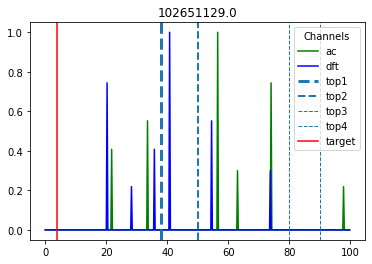

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10643cb0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10643cb0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

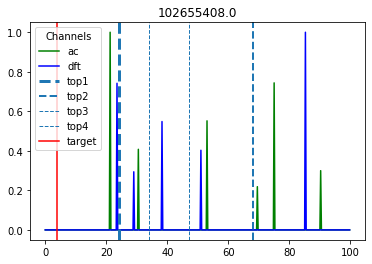

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25236290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b25236290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

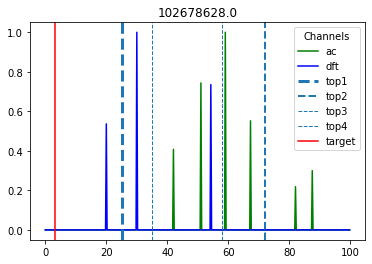

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1040d290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1040d290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102444d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

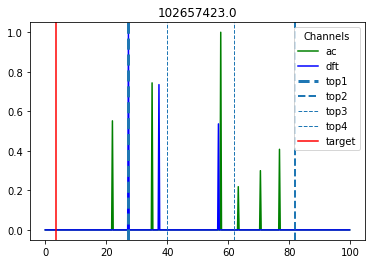

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7017eb00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7017eb00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b102440e0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

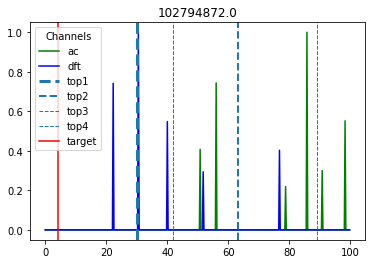

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1021f200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b1021f200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

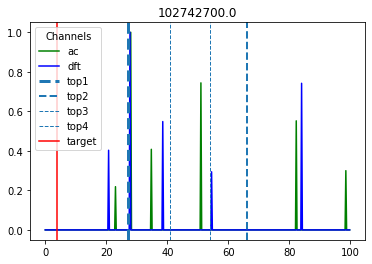

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70040200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70040200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b13e7e5f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

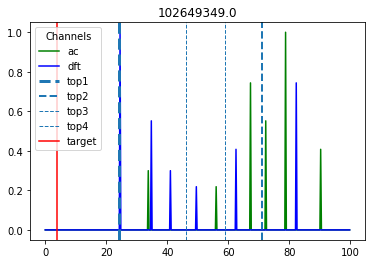

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10696680>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10696680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1021f200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1021f200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

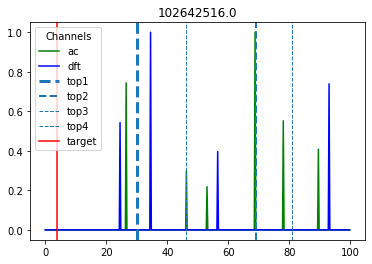

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b24704b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b24704b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1021f200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b1021f200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b10244a70>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

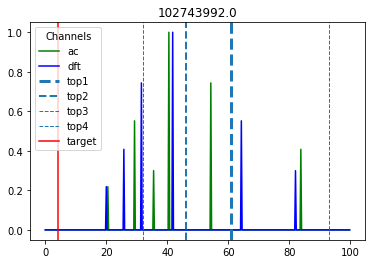

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7e5f9d40>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b7e5f9d40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257030e0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257030e0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257034d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

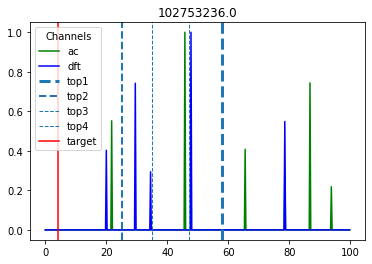

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2502d710>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2502d710>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257034d0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b257034d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b5c05d170>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

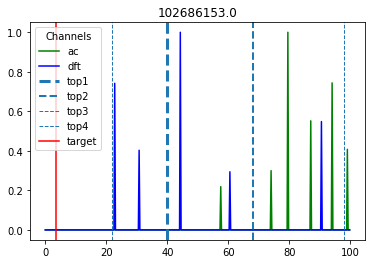

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c05d050>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c05d050>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

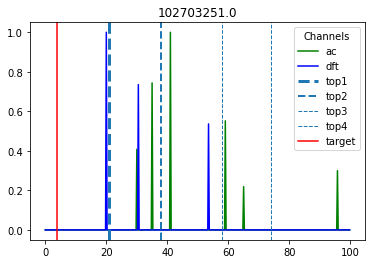

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b247f65f0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b247f65f0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257037a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

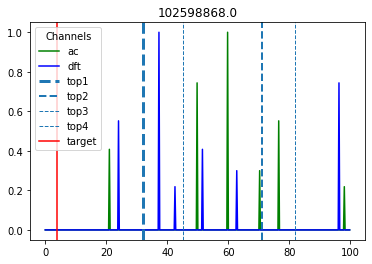

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34436b00>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b34436b00>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

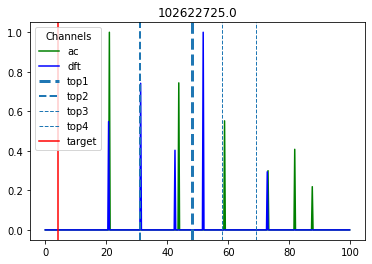

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b104e4d40>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b104e4d40>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257034d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

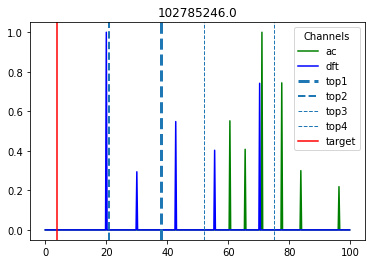

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10244b90>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10244b90>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

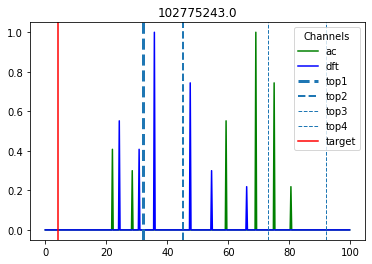

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b253d0a70>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b253d0a70>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257037a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

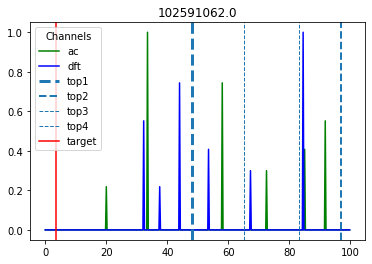

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e4b7a0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13e4b7a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

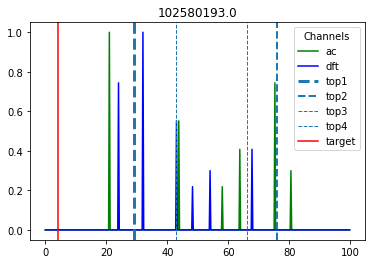

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70159560>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b70159560>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257034d0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

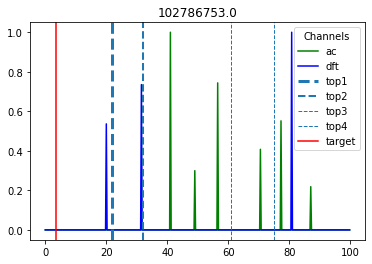

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b106274d0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b106274d0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

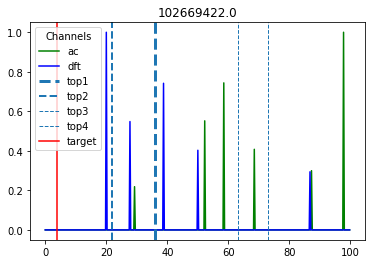

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b250383b0>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b250383b0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b257037a0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

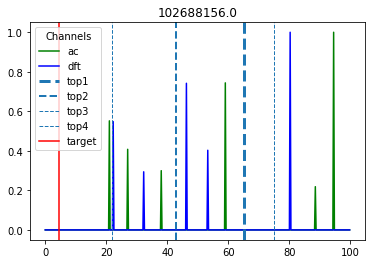

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10381290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b10381290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703830>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

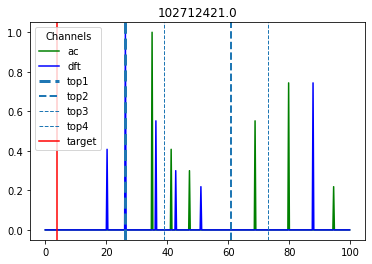

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2571a290>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b2571a290>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b10608200>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703f80>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

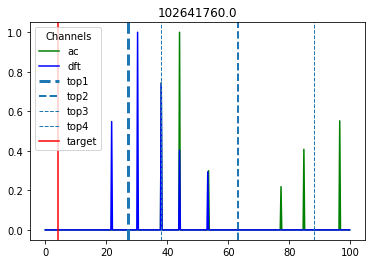

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b256b6710>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b256b6710>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3227a0>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b5c3227a0>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703dd0>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

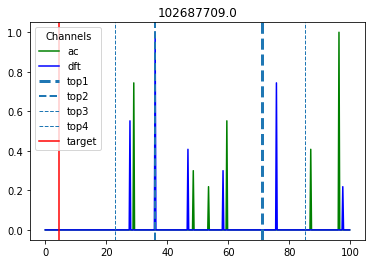

INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13f78170>
    args: (<tf.Tensor 'args_0:0' shape=() dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.permutation at 0x7f7b13f78170>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25347680>
    args: (<tf.Tensor 'args_0:0' shape=(1,) dtype=int64>,)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.__init__.<locals>.slice_batch_indices at 0x7f7b25347680>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <function TensorLikeDataAdapter.slice_inputs.<locals>.grab_batch at 0x7f7b25703b00>
    args: (<tf.Tensor 'args_0:0' shape=(None,) dtype=int64>, <tf.Tensor 'args_1:0' shape=(1, 400, 2) dtype=float32>)
    kwargs: {}

INFO:tensorflow:Allowlisted: <function TensorLikeDataAdapter.slice_inputs

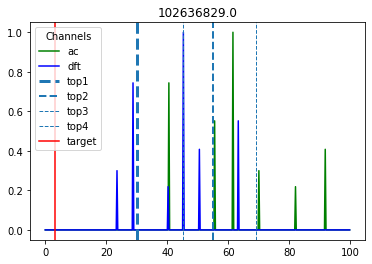

In [124]:
df_results_corot = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_cor,
    take_number=75,
    csv_L=None,
    debug=True,
    dnu_target=False,
)

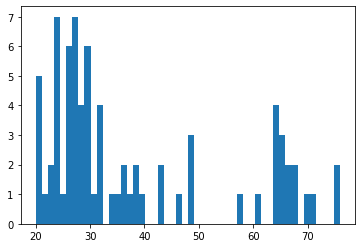

In [125]:
plt.hist(df_results_corot["top1"], bins=50)
plt.show()

In [126]:
# Add L and Teff directly from star data
df_results_corot["L"] = np.nan
df_results_corot["Teff"] = np.nan

for star in df_cor.take(75):
    # id = int(star[0].numpy()[0].decode("utf-8"))
    id = star[0].numpy()[0].decode("utf-8")
    # Loc star
    df_results_corot.loc[df_results_corot.id == str(id), ["Teff"]] = star[3].numpy()[0]
    df_results_corot.loc[df_results_corot.id == str(id), ["L"]] = star[4].numpy()[0]

In [127]:
"""
df_results_corot[df_results_corot['L'] == 0]

df_results_corot["L_mast"] = np.nan
df_results_corot["Teff_mast"] = np.nan


from astroquery.mast import Observations, Catalogs

for star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:
    try:
        catalogTIC = Catalogs.query_object(
            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2
        )
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]
    except:
        print("Problems in %s" % star_name)
"""


'\ndf_results_corot[df_results_corot[\'L\'] == 0]\n\ndf_results_corot["L_mast"] = np.nan\ndf_results_corot["Teff_mast"] = np.nan\n\n\nfrom astroquery.mast import Observations, Catalogs\n\nfor star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:\n    try:\n        catalogTIC = Catalogs.query_object(\n            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2\n        )\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]\n    except:\n        print("Problems in %s" % star_name)\n'

In [128]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df_results_corot)

             id  logg-target top1    e-top1 top2    e-top2 top3    e-top3  \
0   102704304.0        3.250   43  2.394424   22  1.325755   66  2.333309   
1   102761878.0        3.700   26  1.809723   38  5.725276   76  5.193475   
2   102677987.0        3.950   64  2.318347   37  1.611979   22  1.933771   
3   102675756.0        3.175   24  2.130056   71  2.435469   37  3.817130   
4   102575808.0        3.325   24  2.549804   54  1.963553   67  1.967877   
5   102639650.0        3.900   35  1.949552   63  2.006215   47  1.265012   
6   102599598.0        4.000   46  2.160777   24  1.623460   36  0.780176   
7   102650434.0        3.875   21  2.225720   74  2.514696   57  1.848456   
8   102690176.0        3.525   30  1.519834   56  1.398782   42  1.240900   
9   102656251.0        4.200   68  1.525506   23  3.255086   56  3.115652   
10  102694610.0        3.700   36  4.997188   52  1.587725   75  2.441144   
11  102661211.0        3.575   23  2.104199   44  2.256459   70  6.422091   

In [129]:
"""
plt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])
plt.ylabel("Teff MAST")
plt.xlabel("Teff Paparó")
plt.show()
"""

'\nplt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])\nplt.ylabel("Teff MAST")\nplt.xlabel("Teff Paparó")\nplt.show()\n'

In [130]:
"""
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")
plt.legend()
plt.show()
"""

'\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")\nplt.legend()\nplt.show()\n'

In [131]:
df_results_corot["avg_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(get_avg_rho_roche(x["Teff"], x["L"])), axis=1
)

"""
df_results_corot["sd_rho_roche"] = df_results_corot[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1) 
df_results_corot

"""
df_results_corot["sd_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(
        get_avg_rho_roche(x["Teff"], x["L"])
        - np.min(get_avg_rho_roche(x["Teff"], x["L"]))
    ),
    axis=1,
)
df_results_corot


df_results_corot

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***wa

id  logg-target top1    e-top1 top2    e-top2 top3    e-top3  \
0   102704304.0        3.250   43  2.394424   22  1.325755   66  2.333309   
1   102761878.0        3.700   26  1.809723   38  5.725276   76  5.193475   
2   102677987.0        3.950   64  2.318347   37  1.611979   22  1.933771   
3   102675756.0        3.175   24  2.130056   71  2.435469   37  3.817130   
4   102575808.0        3.325   24  2.549804   54  1.963553   67  1.967877   
..          ...          ...  ...       ...  ...       ...  ...       ...   
70  102688156.0        4.400   65  2.019864   43  1.361564   75  1.953392   
71  102712421.0        3.950   26  1.308150   61  3.167826   73  2.217892   
72  102641760.0        4.300   27  1.915560   63  2.278005   38  2.634577   
73  102687709.0        4.400   71  2.094075   36  4.113812   85  2.415930   
74  102636829.0        3.200   30  2.441869   55  1.471433   69  3.634451   

   top4    e-top4  ...   rho-top2  e-rho-top2   rho-top3  e-rho-top3  \
0    56  0.814607  ...  0.0410998    0.013245   0.378116    0.118742   
1    58  2.188390  ...   0.123968    0.039335   0.502794    0.157621   
2    86  1.476916  ...   0.117466    0.037296  0.0410998    0.013245   
3    54  3.255646  ...   0.438216    0.137485   0.117466    0.037296   
4    42  1.644710  ...   0.252105    0.079417   0.389778    0.122379   
..  ...       ...  ...        ...         ...        ...         ...   
70   22  1.832441  ...    0.15913    0.050351    0.48952    0.153482   
71   39  1.315951  ...   0.322487    0.101387   0.463509    0.145372   
72   88  1.963028  ...   0.344203    0.108163   0.123968    0.039335   
73   23  1.758808  ...   0.111142    0.035312   0.630337    0.197384   
74   45  0.610276  ...   0.261625    0.082390   0.413639    0.129821   

     rho-top4  e-rho-top4       L    Teff avg_rho_roche  sd_rho_roche  
0    0.271323    0.085418   0.000  7050.0           NaN           NaN  
1    0.291253    0.091640   9.898  7375.0      0.331983      0.131824  
2    0.645406    0.202083  13.089  7700.0      0.309110      0.111691  
3    0.252105    0.079417   8.999  7350.0      0.373624      0.137029  
4    0.151743    0.048039   0.000  7250.0           NaN           NaN  
..        ...         ...     ...     ...           ...           ...  
70  0.0410998    0.013245   8.445  7725.0      0.485074      0.125350  
71   0.130646    0.041429   5.280  7400.0      0.545843      0.090516  
72   0.676085    0.211647   7.707  7950.0      0.541828      0.053386  
73  0.0449611    0.014468   5.882  7950.0           NaN           NaN  
74   0.174436    0.055141   9.552  7225.0      0.305855      0.107828  

[75 rows x 26 columns]

In [132]:
tops_corot = inferences.select_best_top1(df_results_corot, target_column="avg_rho_roche")
print(tops_corot)

[43 52 64 48 24 35 92 42 30 68 72 46 52 24 54 54 28 64 86 64 32 68 67 32
 64 28 65 21 68 40 76 66 21 74 56 65 58 24 28 49 70 24 26 26 62 26 54 27
 75 46 38 24 25 27 60 54 24 60 61 58 40 21 64 96 76 32 48 58 44 72 65 52
 54 71 60]


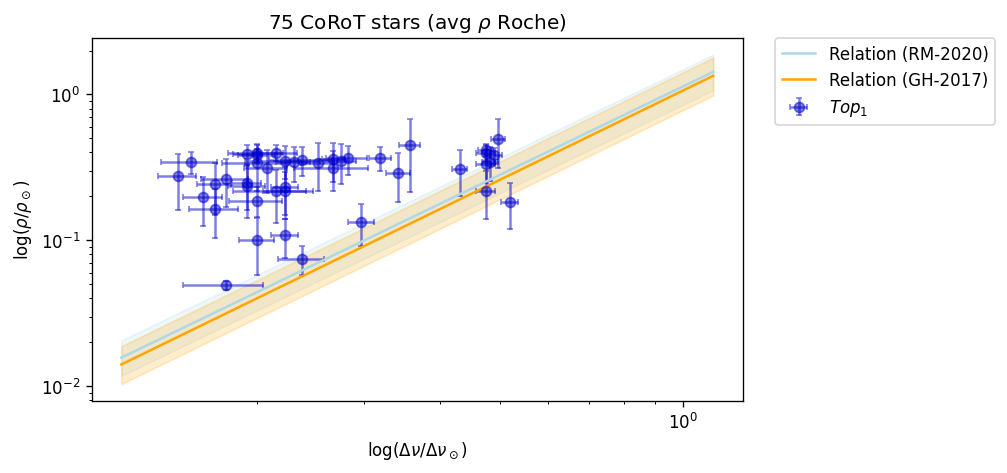

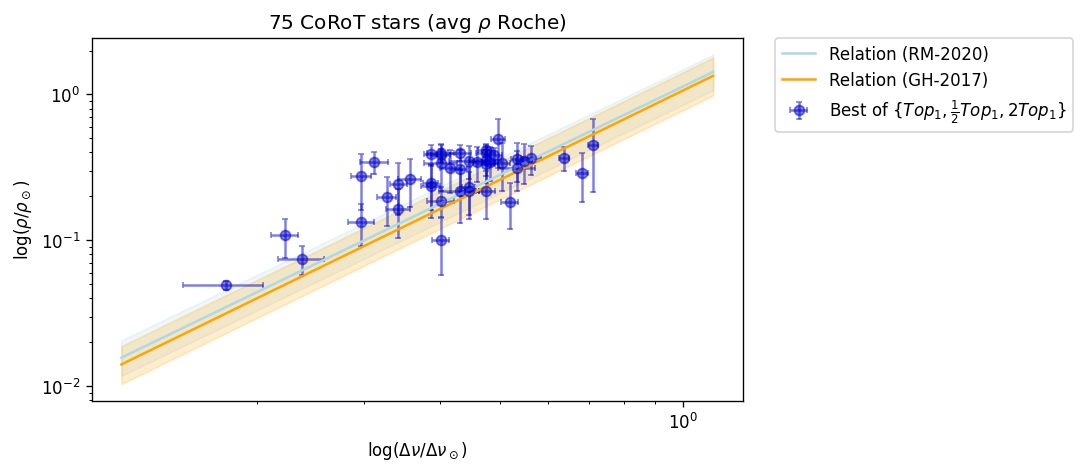

In [133]:
inferences.plot_relation_rodriguez(
    dnus=df_results_corot["top1"].values.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    # points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.12, 1.3),
    # xlim=(0, 0.4),
    # ylim=(0.15, 0.5)
)

inferences.plot_relation_rodriguez(
    dnus=tops_corot.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    # points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.12, 1.3),
    # xlim=(0.2, 0.6),
    # ylim=(0.12, 0.5)
)